In [0]:
!pip install tensorflow-gpu==2.0.0-rc0

     |████████████████████████████████| 380.5MB 65kB/s 
     |████████████████████████████████| 501kB 54.2MB/s 
     |████████████████████████████████| 4.3MB 45.5MB/s 


In [0]:
import tensorflow as tf
print(tf.__version__)

2.0.0-rc0


In [0]:
import tensorflow as tf
import matplotlib.pyplot as plt
import sklearn as sk
import pandas as pd
import numpy as np
import csv
from sklearn.preprocessing import RobustScaler
from sklearn.model_selection import KFold, cross_val_score


import xgboost as xgb
import lightgbm as lgb
from lightgbm import LGBMRegressor

import gc

In [0]:
from google.colab import files
uploaded= files.upload()


Saving AAPL.csv to AAPL.csv


In [0]:
df =pd.read_csv('AAPL.csv')

In [0]:
df.set_index('Date', inplace = True)
df.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2010-09-03,36.441429,36.968571,36.357143,36.967144,32.261719,130197200
2010-09-07,36.662857,37.075714,36.607143,36.830002,32.142021,85639400
2010-09-08,37.111427,37.770000,37.014286,37.560001,32.779102,131637800
2010-09-09,37.862858,38.074287,37.560001,37.581429,32.797817,109643800
2010-09-10,37.598572,37.785713,37.342857,37.630001,32.840195,96885600


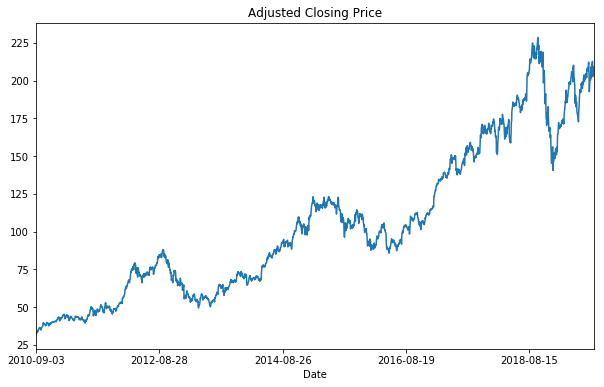

In [0]:
df['Adj Close'].plot(label = 'Apple', figsize = (10, 6), title= 'Adjusted Closing Price')

In [0]:
split_time = int(0.8*len(df['Adj Close']))
split_time 


1810

In [0]:

window_size = 365
batch_size = 32
shuffle_buffer_size = 300

num_samples = len(df) - window_size
indices = np.arange(num_samples).astype(np.int)[:,None] + np.arange(window_size + 1).astype(np.int)

In [0]:
data= df['Adj Close'].values[indices]


In [0]:
X = data[:,:-1] 
y = data[:,-1]

In [0]:
X_train = X[:split_time]
y_train =y[:split_time]
X_test =X[split_time:]
y_test= y[split_time:]

In [0]:
y_test.shape

(88,)

In [0]:

def rmsle(y, y_pred):
    return np.sqrt(sk.metrics.mean_squared_error(y, y_pred))


In [0]:
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import ElasticNetCV, LassoCV, RidgeCV
from sklearn.svm import SVR
from sklearn.ensemble import GradientBoostingRegressor

ridge = RidgeCV().fit(X_train, y_train)
lasso = LassoCV().fit(X_train, y_train)
elasticnet = ElasticNetCV().fit(X_train, y_train)                             
svr =SVR().fit(X_train, y_train)

/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 415.0217636199877, tolerance: 345.47701300612647
  positive)
/usr/local/lib/python3.6/dist-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' 

In [0]:
gbr = GradientBoostingRegressor()
gbr.fit(X_train, y_train)

gbr_model = gbr.fit(X_train, y_train)




lightgbm = LGBMRegressor()

clf = lightgbm.fit(X_train, y_train)
y_mean = np.mean(y_train)
from xgboost import XGBRegressor

xgboost = XGBRegressor()

xgboost_model = xgboost.fit(X_train, y_train)

/usr/local/lib/python3.6/dist-packages/xgboost/core.py:614: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  "because it will generate extra copies and increase memory consumption")


[01:11:53] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


In [0]:
from mlxtend.regressor import StackingCVRegressor

stack_gen = StackingCVRegressor(regressors=(ridge, lasso, elasticnet),
                                meta_regressor=elasticnet,
                                use_features_in_secondary=True)
stack_gen_model= stack_gen.fit(X_train, y_train)

/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)
/usr

In [0]:

print('ridge' ,rmsle(y_test, ridge.predict(X_test)))
print('lasso' ,rmsle(y_test, lasso.predict(X_test)))
print('elasticnet' ,rmsle(y_test, elasticnet.predict(X_test)))
print('svr' ,rmsle(y_test, svr.predict(X_test)))
print('gbr' ,rmsle(y_test, gbr.predict(X_test)))
print('lightgbm' ,rmsle(y_test, clf.predict(X_test)))
print('XGB' ,rmsle(y_test, xgboost_model.predict(X_test)))
print('stack_gen_model' ,rmsle(y_test, stack_gen_model.predict(X_test)))

ridge 4.262928948079911
lasso 3.596960735531209
elasticnet 3.6593812098560012
svr 95.12819349259703
gbr 4.131132181777998
lightgbm 4.546038346011759
XGB 4.133492371037094
stack_gen_model 3.6115948015299004


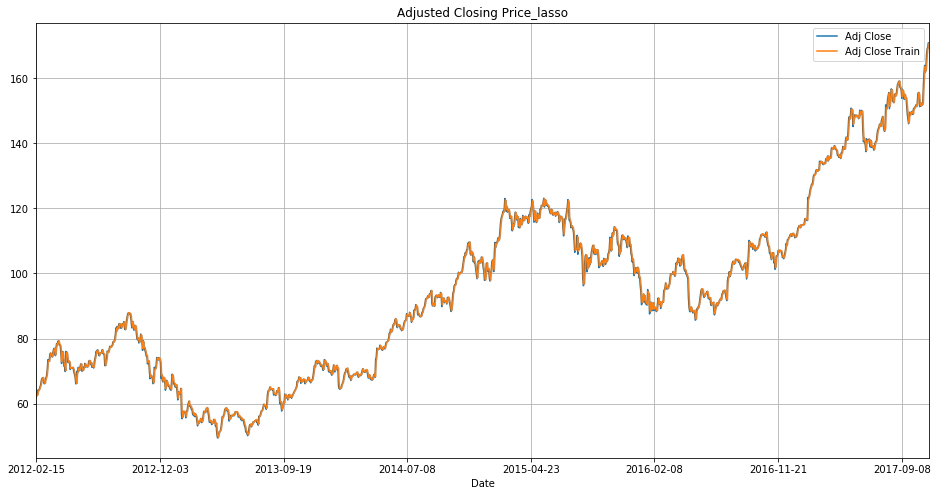

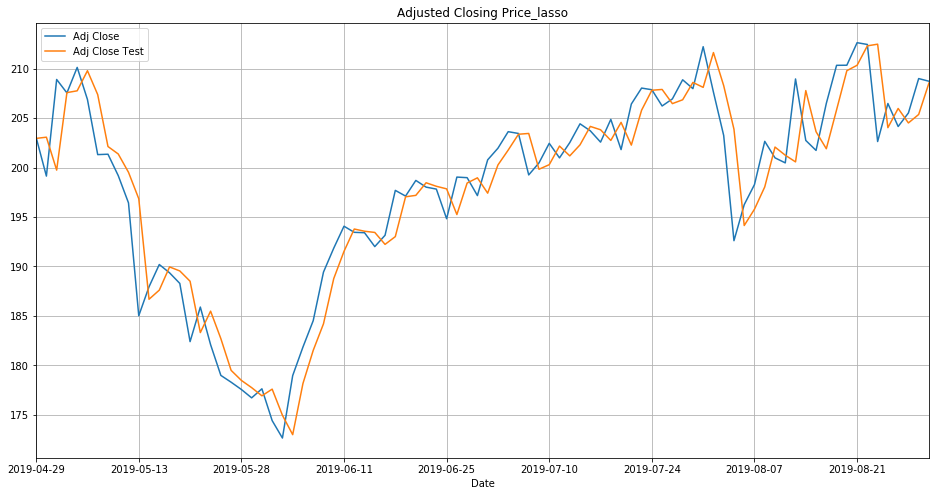

In [0]:
df_lasso = df.copy()
df_lasso.drop(['Open', 'High', 'Low', 'Close', 'Volume'], axis=1, inplace=True)
df_lasso = df_lasso.iloc[window_size:split_time] 
df_lasso['Adj Close Train'] = lasso.predict(X_train)[:-window_size]
df_lasso.plot(label='AAPL', figsize=(16,8), title='Adjusted Closing Price_lasso', grid=True)


df_lasso = df.copy()
df_lasso.drop(['Open', 'High', 'Low', 'Close', 'Volume'], axis=1, inplace=True)
df_lasso = df_lasso.iloc[window_size+split_time:]
df_lasso['Adj Close Test'] = lasso.predict(X_test)
df_lasso.plot(label='AAPL', figsize=(16,8), title='Adjusted Closing Price_lasso', grid=True)

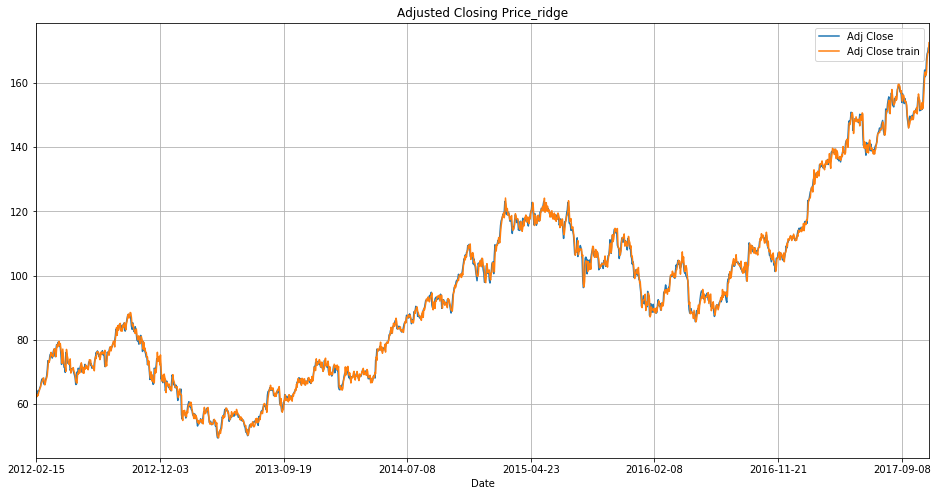

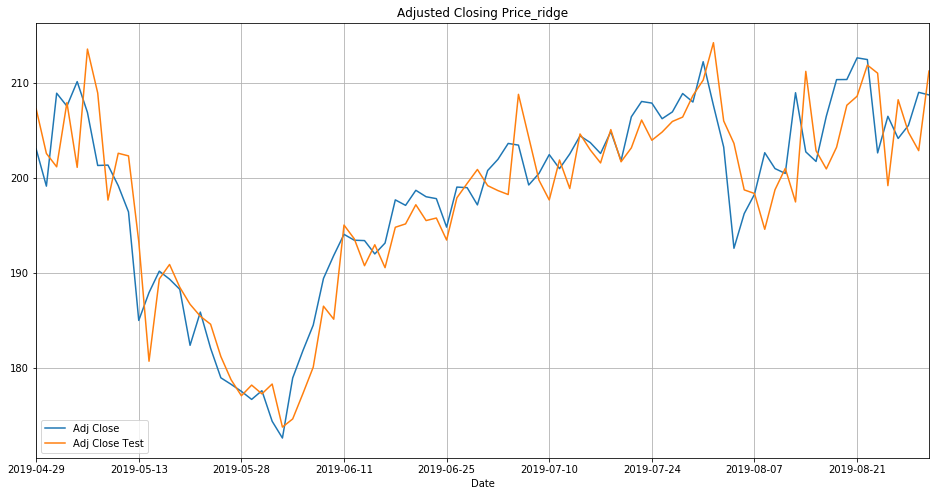

In [0]:
df_ridge = df.copy()
df_ridge.drop(['Open', 'High', 'Low', 'Close', 'Volume'], axis=1, inplace=True)
df_ridge = df_ridge.iloc[window_size:split_time]
df_ridge['Adj Close train'] = ridge.predict(X_train)[:-window_size]
df_ridge.plot(label='AAPL', figsize=(16,8), title='Adjusted Closing Price_ridge', grid=True)

df_ridge = df.copy()
df_ridge.drop(['Open', 'High', 'Low', 'Close', 'Volume'], axis=1, inplace=True)
df_ridge = df_ridge.iloc[window_size+split_time:]
df_ridge['Adj Close Test'] = ridge.predict(X_test)
df_ridge.plot(label='AAPL', figsize=(16,8), title='Adjusted Closing Price_ridge', grid=True)

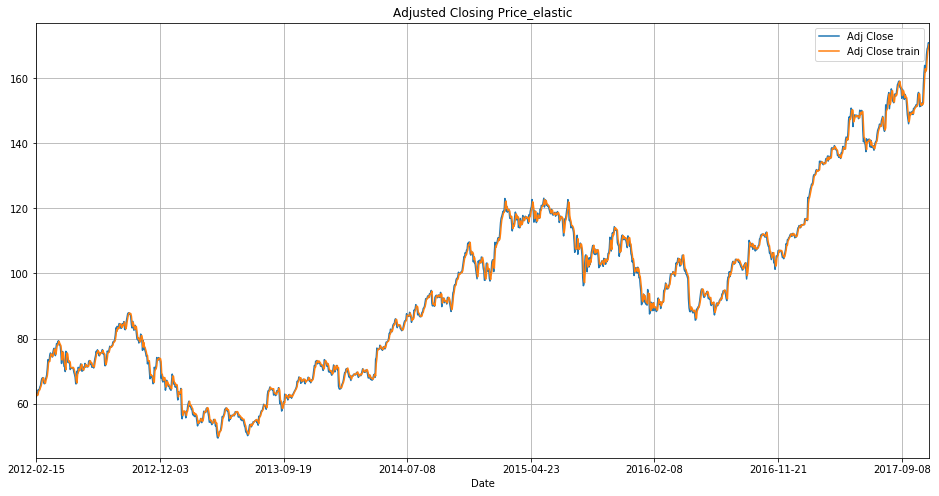

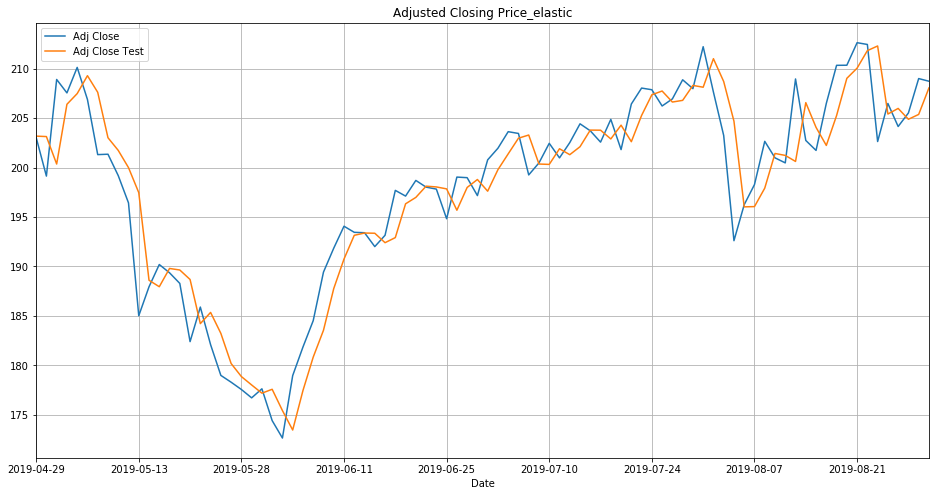

In [0]:
df_elsastic = df.copy()
df_elsastic.drop(['Open', 'High', 'Low', 'Close', 'Volume'], axis=1, inplace=True)
df_elsastic = df_elsastic.iloc[window_size:split_time]
df_elsastic['Adj Close train'] = elasticnet.predict(X_train)[:-window_size]
df_elsastic.plot(label='AAPL', figsize=(16,8), title='Adjusted Closing Price_elastic', grid=True)

df_elsastic = df.copy()
df_elsastic.drop(['Open', 'High', 'Low', 'Close', 'Volume'], axis=1, inplace=True)
df_elsastic = df_elsastic.iloc[window_size+split_time:]
df_elsastic['Adj Close Test'] = elasticnet.predict(X_test)
df_elsastic.plot(label='AAPL', figsize=(16,8), title='Adjusted Closing Price_elastic', grid=True)

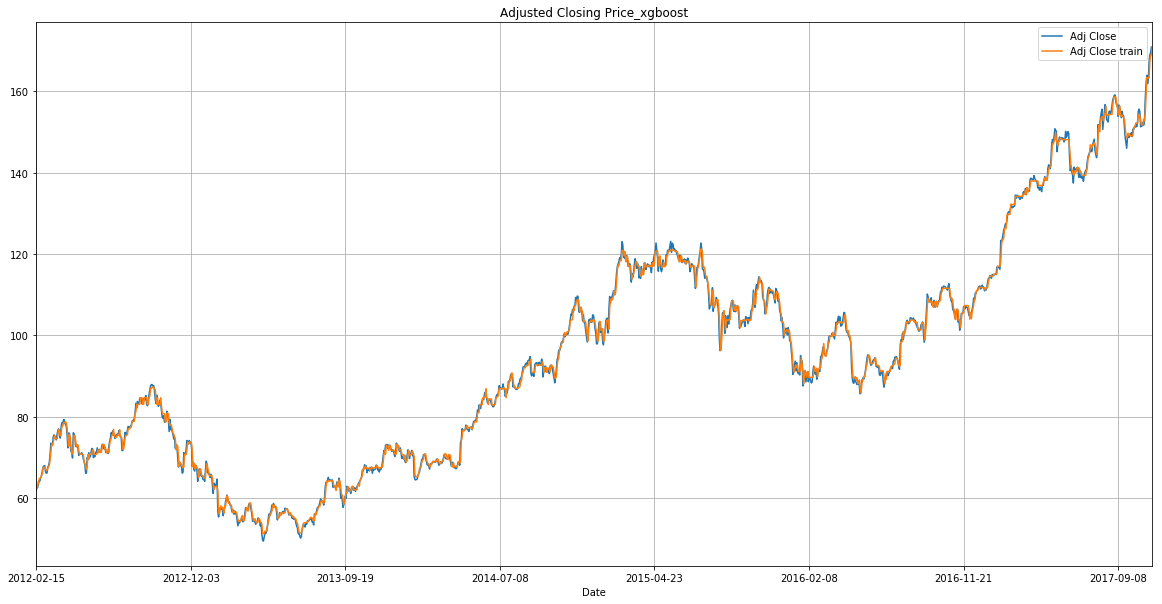

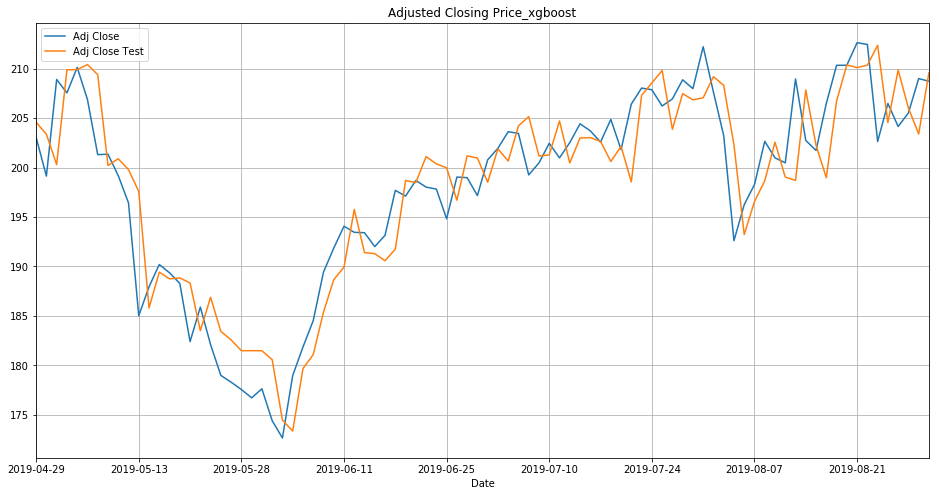

In [0]:
df_xgboost_model = df.copy()
df_xgboost_model.drop(['Open', 'High', 'Low', 'Close', 'Volume'], axis=1, inplace=True)
df_xgboost_model = df_xgboost_model.iloc[window_size:split_time]
df_xgboost_model['Adj Close train'] = xgboost_model.predict(X_train)[:-window_size]
df_xgboost_model.plot(label='AAPL', figsize=(20,10), title='Adjusted Closing Price_xgboost', grid=True)


df_xgboost_model = df.copy()
df_xgboost_model.drop(['Open', 'High', 'Low', 'Close', 'Volume'], axis=1, inplace=True)
df_xgboost_model = df_xgboost_model.iloc[window_size+split_time:]
df_xgboost_model['Adj Close Test'] =xgboost_model.predict(X_test)
df_xgboost_model.plot(label='AAPL', figsize=(16,8), title='Adjusted Closing Price_xgboost', grid=True)

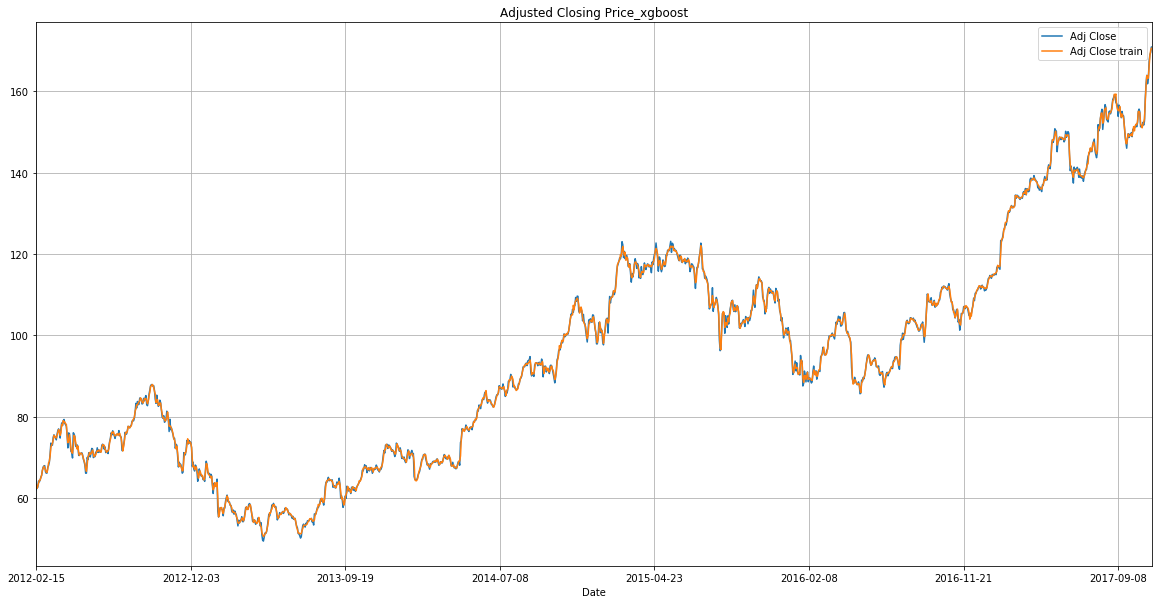

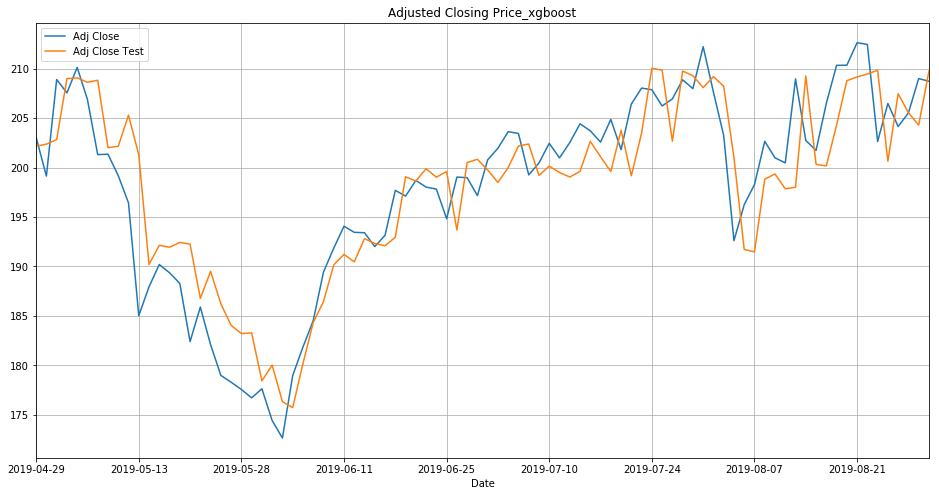

In [0]:
df_clf = df.copy()
df_clf.drop(['Open', 'High', 'Low', 'Close', 'Volume'], axis=1, inplace=True)
df_clf = df_clf.iloc[window_size:split_time]
df_clf['Adj Close train'] = clf.predict(X_train)[:-window_size]
df_clf.plot(label='AAPL', figsize=(20,10), title='Adjusted Closing Price_xgboost', grid=True)


df_clf = df.copy()
df_clf.drop(['Open', 'High', 'Low', 'Close', 'Volume'], axis=1, inplace=True)
df_clf = df_clf.iloc[window_size+split_time:]
df_clf['Adj Close Test'] =clf.predict(X_test)
df_clf.plot(label='AAPL', figsize=(16,8), title='Adjusted Closing Price_xgboost', grid=True)

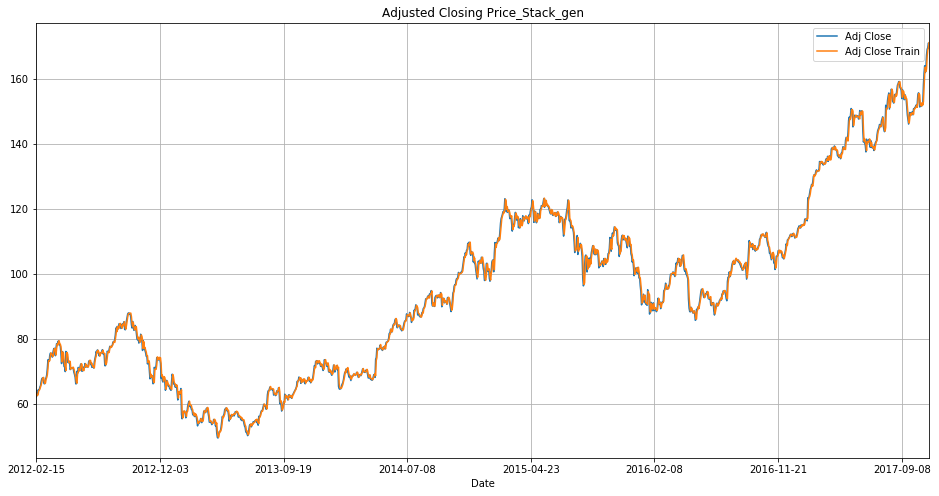

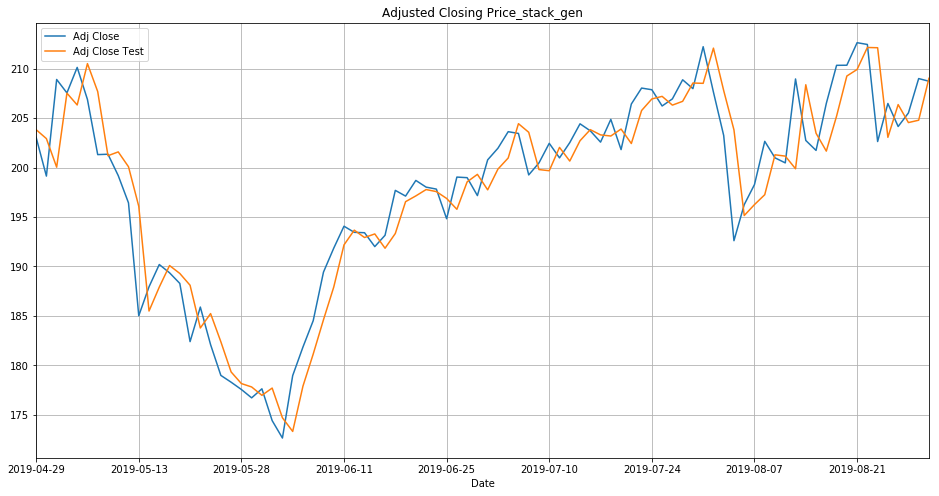

In [0]:
df_stack_gen_model = df.copy()
df_stack_gen_model.drop(['Open', 'High', 'Low', 'Close', 'Volume'], axis=1, inplace=True)
df_stack_gen_model = df_stack_gen_model.iloc[window_size:split_time] # Past 32 days we don't know yet
df_stack_gen_model['Adj Close Train'] = stack_gen_model.predict(X_train)[:-window_size]
df_stack_gen_model.plot(label='AAPL', figsize=(16,8), title='Adjusted Closing Price_Stack_gen', grid=True)


df_stack_gen_model = df.copy()
df_stack_gen_model.drop(['Open', 'High', 'Low', 'Close', 'Volume'], axis=1, inplace=True)
df_stack_gen_model = df_stack_gen_model.iloc[window_size+split_time:]
df_stack_gen_model['Adj Close Test'] = stack_gen_model.predict(X_test)
df_stack_gen_model.plot(label='AAPL', figsize=(16,8), title='Adjusted Closing Price_stack_gen', grid=True)

In [0]:

scaler = sk.preprocessing.MinMaxScaler(feature_range=(-1, 1))
data_transform = scaler.fit_transform(df['Adj Close'].values[:,None])
data_transform = data_transform[indices]

In [0]:
X2 = data_transform[:,:-1]
y2 = data_transform[:,-1]
X_train_reshape = X2[:split_time]
y_train_reshape = y2[:split_time]
X_test_reshape = X2[split_time:]
y_test_reshape = y2[split_time:]



In [0]:
keras_model = tf.keras.models.Sequential([
  tf.keras.layers.Conv1D(filters=64, kernel_size=5, input_shape=(window_size, 1), strides=1, padding="causal", activation="relu"), 
  tf.keras.layers.LSTM(64),
  tf.keras.layers.Dense(64, activation="relu"),
  tf.keras.layers.Dense(64, activation="relu"),
  tf.keras.layers.Dense(1)
])


optimizer = tf.keras.optimizers.Adam()
keras_model.compile(loss=tf.keras.losses.Huber(),
                    optimizer=optimizer,
                    metrics=["mae"])
history = keras_model.fit(X_train_reshape, y_train_reshape, batch_size=256, epochs=250, validation_data=(X_test_reshape, y_test_reshape))

Train on 1810 samples, validate on 88 samples
Epoch 1/250


W0904 01:12:14.398176 140236939061120 deprecation.py:323] From /usr/local/lib/python3.6/dist-packages/tensorflow_core/python/ops/math_grad.py:1394: where (from tensorflow.python.ops.array_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


1810/1810 [==============================] - 6s 3ms/sample - loss: 0.0660 - mae: 0.2983 - val_loss: 0.1715 - val_mae: 0.5786
Epoch 2/250
1810/1810 [==============================] - 0s 116us/sample - loss: 0.0209 - mae: 0.1532 - val_loss: 0.0224 - val_mae: 0.1980
Epoch 3/250
1810/1810 [==============================] - 0s 117us/sample - loss: 0.0051 - mae: 0.0796 - val_loss: 0.0075 - val_mae: 0.0987
Epoch 4/250
1810/1810 [==============================] - 0s 115us/sample - loss: 0.0024 - mae: 0.0555 - val_loss: 0.0116 - val_mae: 0.1368
Epoch 5/250
1810/1810 [==============================] - 0s 115us/sample - loss: 0.0021 - mae: 0.0487 - val_loss: 0.0026 - val_mae: 0.0615
Epoch 6/250
1810/1810 [==============================] - 0s 114us/sample - loss: 0.0014 - mae: 0.0401 - val_loss: 0.0025 - val_mae: 0.0580
Epoch 7/250
1810/1810 [==============================] - 0s 112us/sample - loss: 0.0011 - mae: 0.0357 - val_loss: 0.0034 - val_mae: 0.0749
Epoch 8/250
1810/1810 [==================

keras_model 3.85725399235953


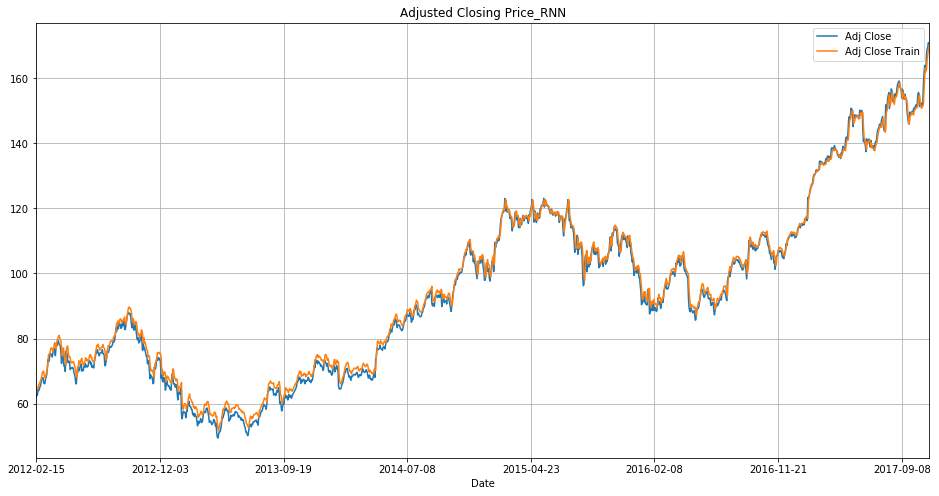

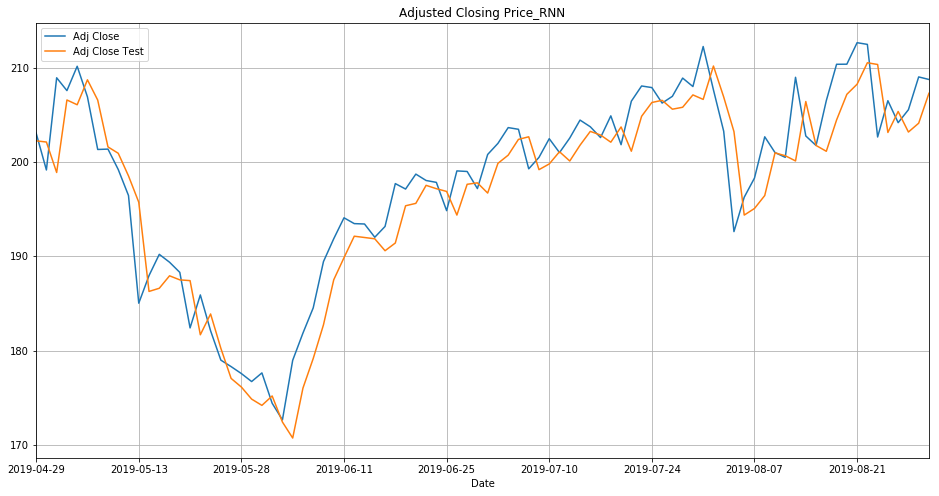

In [0]:
y_pred_train_keras = scaler.inverse_transform(keras_model.predict(X_train_reshape, batch_size=256))
y_pred_keras = scaler.inverse_transform(keras_model.predict(X_test_reshape, batch_size=256))
print('keras_model' ,rmsle(y_test, y_pred_keras))


df_keras = df.copy()
df_keras.drop(['Open', 'High', 'Low', 'Close', 'Volume'], axis=1, inplace=True)
df_keras = df_keras.iloc[window_size:split_time] 
df_keras['Adj Close Train'] = y_pred_train_keras[:-window_size]
df_keras.plot(label='TSLA', figsize=(16,8), title='Adjusted Closing Price_RNN', grid=True)
df_keras = df.copy()
df_keras.drop(['Open', 'High', 'Low', 'Close', 'Volume'], axis=1, inplace=True)
df_keras = df_keras.iloc[split_time+window_size:] 
df_keras['Adj Close Test'] = y_pred_keras
df_keras.plot(label='APPLE', figsize=(16,8), title='Adjusted Closing Price_RNN', grid=True)

In [0]:
keras_model_2 = tf.keras.models.Sequential([
  tf.keras.layers.Conv1D(filters=128, kernel_size=5, input_shape=(window_size, 1), strides=1, padding="causal", activation="relu"), 
  tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(128, return_sequences= True)),
  tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(128)),
  tf.keras.layers.Dense(128, activation="relu"),
  tf.keras.layers.Dense(128, activation="relu"),
  tf.keras.layers.Dense(1)
])


optimizer = tf.keras.optimizers.Adam()
keras_model_2.compile(loss=tf.keras.losses.Huber(),
                    optimizer=optimizer,
                    metrics=["mae"])
history = keras_model_2.fit(X_train_reshape, y_train_reshape, batch_size=256, epochs=250, validation_data=(X_test_reshape, y_test_reshape))

Train on 1810 samples, validate on 88 samples
Epoch 1/250
1810/1810 [==============================] - 8s 4ms/sample - loss: 0.0444 - mae: 0.2276 - val_loss: 0.0179 - val_mae: 0.1691
Epoch 2/250
1810/1810 [==============================] - 2s 835us/sample - loss: 0.0054 - mae: 0.0740 - val_loss: 0.0039 - val_mae: 0.0806
Epoch 3/250
1810/1810 [==============================] - 2s 834us/sample - loss: 0.0023 - mae: 0.0514 - val_loss: 0.0067 - val_mae: 0.1067
Epoch 4/250
1810/1810 [==============================] - 2s 834us/sample - loss: 0.0017 - mae: 0.0426 - val_loss: 0.0062 - val_mae: 0.0813
Epoch 5/250
1810/1810 [==============================] - 2s 837us/sample - loss: 0.0014 - mae: 0.0380 - val_loss: 0.0044 - val_mae: 0.0665
Epoch 6/250
1810/1810 [==============================] - 2s 830us/sample - loss: 0.0012 - mae: 0.0346 - val_loss: 0.0043 - val_mae: 0.0673
Epoch 7/250
1810/1810 [==============================] - 2s 832us/sample - loss: 0.0014 - mae: 0.0370 - val_loss: 0.0049 -

In [0]:
y_pred_train_keras_2 = scaler.inverse_transform(keras_model_2.predict(X_train_reshape, batch_size=256))
y_pred_keras_2 = scaler.inverse_transform(keras_model_2.predict(X_test_reshape, batch_size=256))
print('keras_model_2' ,rmsle(y_test, y_pred_keras_2))


keras_model_2 4.031588967746898


In [0]:
keras_model_3 = tf.keras.models.Sequential([
  tf.keras.layers.Conv1D(filters=64, kernel_size=5, input_shape=(window_size, 1), strides=1, padding="causal", activation="relu"), 

  tf.keras.layers.LSTM(64),

  tf.keras.layers.Dense(1),
])


optimizer = tf.keras.optimizers.Adam()
keras_model_3.compile(loss=tf.keras.losses.Huber(),
                    optimizer=optimizer,
                    metrics=["mae"])
history = keras_model_3.fit(X_train_reshape, y_train_reshape, batch_size=256, epochs=500, validation_data=(X_test_reshape, y_test_reshape))

Train on 1810 samples, validate on 88 samples
Epoch 1/500
1810/1810 [==============================] - 2s 1ms/sample - loss: 0.0788 - mae: 0.3310 - val_loss: 0.0361 - val_mae: 0.2572
Epoch 2/500
1810/1810 [==============================] - 0s 124us/sample - loss: 0.0101 - mae: 0.1244 - val_loss: 0.0189 - val_mae: 0.1763
Epoch 3/500
1810/1810 [==============================] - 0s 118us/sample - loss: 0.0043 - mae: 0.0710 - val_loss: 0.0028 - val_mae: 0.0617
Epoch 4/500
1810/1810 [==============================] - 0s 116us/sample - loss: 0.0027 - mae: 0.0585 - val_loss: 0.0031 - val_mae: 0.0684
Epoch 5/500
1810/1810 [==============================] - 0s 114us/sample - loss: 0.0020 - mae: 0.0518 - val_loss: 0.0027 - val_mae: 0.0575
Epoch 6/500
1810/1810 [==============================] - 0s 114us/sample - loss: 0.0013 - mae: 0.0385 - val_loss: 0.0025 - val_mae: 0.0570
Epoch 7/500
1810/1810 [==============================] - 0s 113us/sample - loss: 0.0012 - mae: 0.0374 - val_loss: 0.0025 -

In [0]:
y_pred_train_keras_3 = scaler.inverse_transform(keras_model_3.predict(X_train_reshape, batch_size=256))
y_pred_keras_3 = scaler.inverse_transform(keras_model_3.predict(X_test_reshape, batch_size=256))
print('keras_model_3' ,rmsle(y_test, y_pred_keras_3))

keras_model_3 3.9481262398037225


In [0]:
keras_model_4 = tf.keras.models.Sequential([
    
  tf.keras.layers.Conv1D(filters=64, kernel_size=5, input_shape=(window_size, 1), strides=1, padding="causal", activation="relu"), 
  #tf.keras.layers.Conv1D(filters=128, kernel_size=5),
  #tf.keras.layers.LSTM(10, return_sequences = True),
  tf.keras.layers.LSTM(5),
  tf.keras.layers.Dense(1),
])


optimizer = tf.keras.optimizers.Adam()
keras_model_4.compile(loss=tf.keras.losses.Huber(),
                    optimizer=optimizer,
                    metrics=["mae"])
history = keras_model_4.fit(X_train_reshape, y_train_reshape, batch_size=256, epochs=500, validation_data=(X_test_reshape, y_test_reshape))

Train on 1810 samples, validate on 88 samples
Epoch 1/500
1810/1810 [==============================] - 2s 1ms/sample - loss: 0.0840 - mae: 0.3549 - val_loss: 0.0999 - val_mae: 0.4378
Epoch 2/500
1810/1810 [==============================] - 0s 93us/sample - loss: 0.0312 - mae: 0.2010 - val_loss: 0.0406 - val_mae: 0.2732
Epoch 3/500
1810/1810 [==============================] - 0s 92us/sample - loss: 0.0118 - mae: 0.1198 - val_loss: 0.0164 - val_mae: 0.1647
Epoch 4/500
1810/1810 [==============================] - 0s 90us/sample - loss: 0.0060 - mae: 0.0917 - val_loss: 0.0062 - val_mae: 0.1014
Epoch 5/500
1810/1810 [==============================] - 0s 93us/sample - loss: 0.0055 - mae: 0.0882 - val_loss: 0.0033 - val_mae: 0.0729
Epoch 6/500
1810/1810 [==============================] - 0s 90us/sample - loss: 0.0046 - mae: 0.0814 - val_loss: 0.0029 - val_mae: 0.0680
Epoch 7/500
1810/1810 [==============================] - 0s 88us/sample - loss: 0.0033 - mae: 0.0687 - val_loss: 0.0033 - val_m

In [0]:
y_pred_train_keras_4 = scaler.inverse_transform(keras_model_4.predict(X_train_reshape, batch_size=256))
y_pred_keras_4 = scaler.inverse_transform(keras_model_4.predict(X_test_reshape, batch_size=256))
print('keras_model_4' ,rmsle(y_test, y_pred_keras_4))

keras_model_4 3.586667565666627


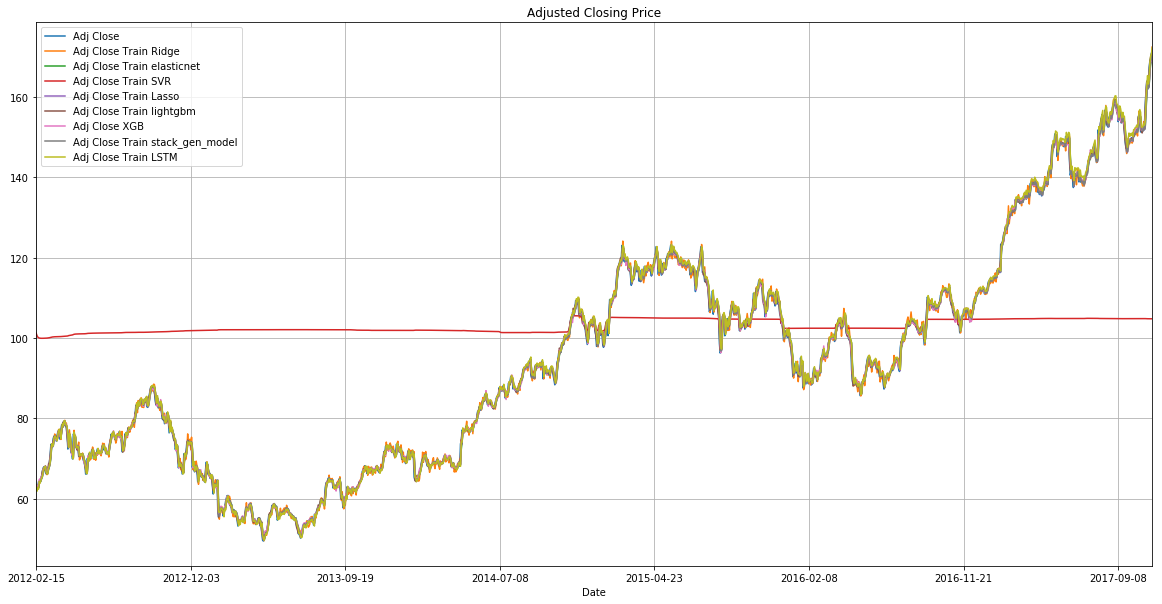

In [0]:



df_train = df.copy()
df_train.drop(['Open', 'High', 'Low', 'Close', 'Volume'], axis=1, inplace=True)
df_train = df_train.iloc[window_size:split_time] 
df_train['Adj Close Train Ridge'] = ridge.predict(X_train)[:-window_size]
df_train['Adj Close Train elasticnet'] = elasticnet.predict(X_train)[:-window_size]
df_train['Adj Close Train SVR'] = svr.predict(X_train)[:-window_size]
df_train['Adj Close Train Lasso'] =lasso.predict(X_train)[:-window_size]
df_train['Adj Close Train lightgbm'] = clf.predict(X_train)[:-window_size]
df_train['Adj Close XGB']= xgboost_model.predict(X_train)[:-window_size]
df_train['Adj Close Train stack_gen_model'] = stack_gen_model.predict(X_train)[:-window_size]
df_train['Adj Close Train LSTM'] = y_pred_train_keras_3[:-window_size]

df_train.plot(label='AAPL', figsize=(20,10), title='Adjusted Closing Price', grid=True)

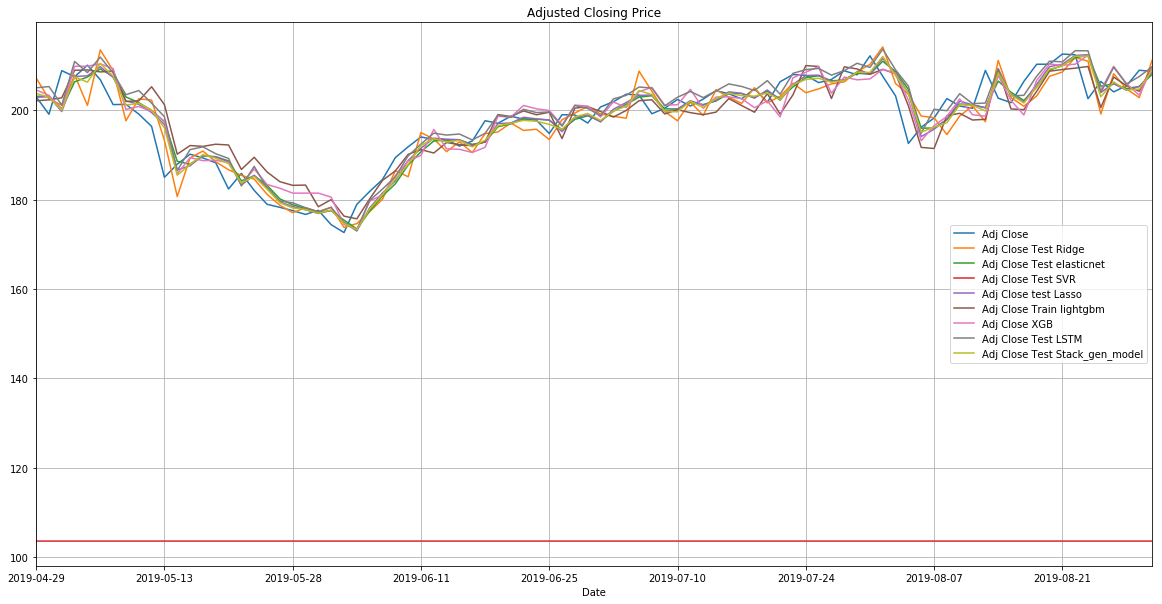

In [0]:
df_test = df.copy()
df_test.drop(['Open', 'High', 'Low', 'Close', 'Volume'], axis=1, inplace=True)
df_test = df_test.iloc[window_size+split_time:] 
df_test['Adj Close Test Ridge'] = ridge.predict(X_test)
df_test['Adj Close Test elasticnet'] = elasticnet.predict(X_test)
df_test['Adj Close Test SVR'] = svr.predict(X_test)
df_test['Adj Close test Lasso'] =lasso.predict(X_test)
df_test['Adj Close Train lightgbm'] = clf.predict(X_test)
df_test['Adj Close XGB']= xgboost_model.predict(X_test)
df_test['Adj Close Test LSTM'] = y_pred_keras_3 
df_test['Adj Close Test Stack_gen_model'] = stack_gen_model.predict(X_test)
df_test.plot(label='AAPL', figsize=(20,10), title='Adjusted Closing Price', grid=True)

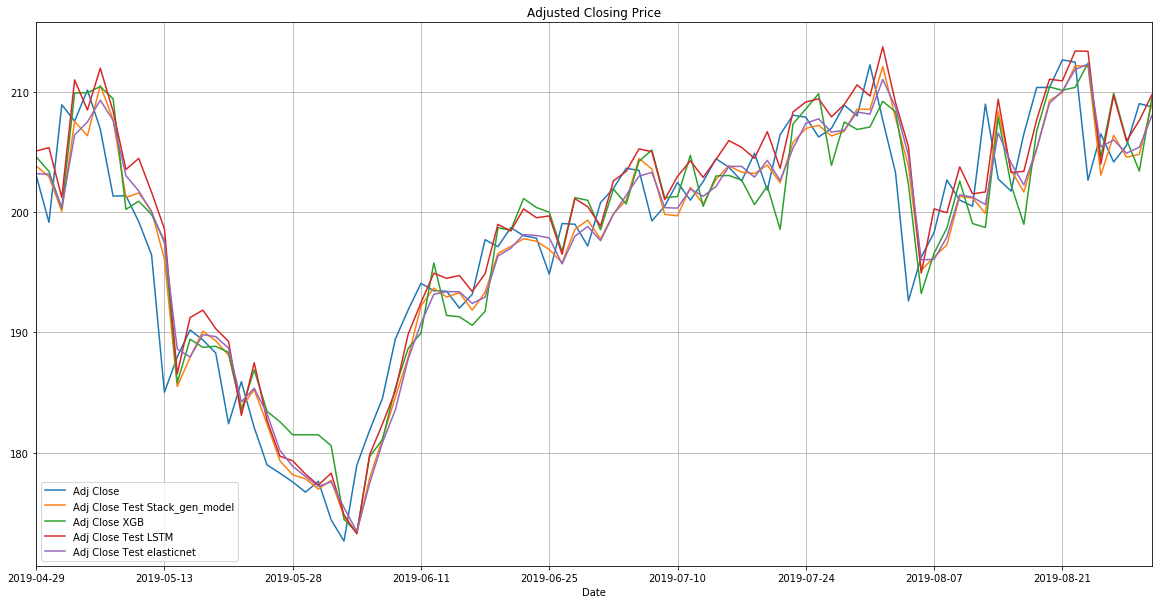

In [0]:
df_test = df.copy()
df_test.drop(['Open', 'High', 'Low', 'Close', 'Volume'], axis=1, inplace=True)
df_test = df_test.iloc[window_size+split_time:] 
df_test['Adj Close Test Stack_gen_model'] = stack_gen_model.predict(X_test)
df_test['Adj Close XGB']= xgboost_model.predict(X_test)
df_test['Adj Close Test LSTM'] = y_pred_keras_3 
#df_test['Adj Close Test Ridge'] = ridge.predict(X_test)
df_test['Adj Close Test elasticnet'] = elasticnet.predict(X_test)
df_test.plot(label='AAPL', figsize=(20,10), title='Adjusted Closing Price', grid=True)


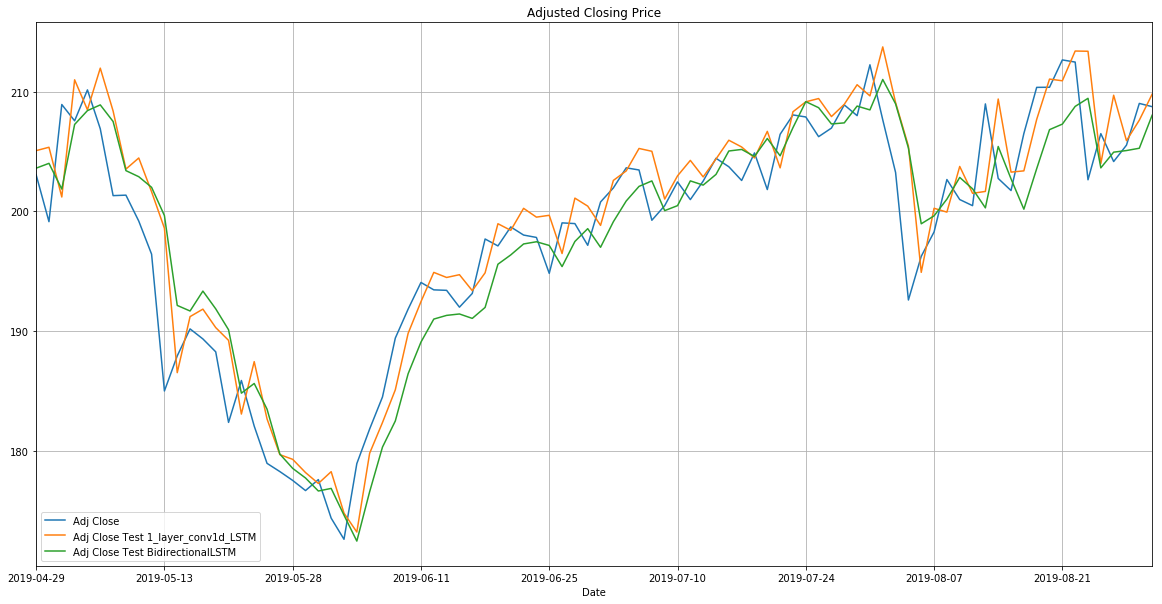

In [0]:
df_test = df.copy()
df_test.drop(['Open', 'High', 'Low', 'Close', 'Volume'], axis=1, inplace=True)
df_test = df_test.iloc[window_size+split_time:]
df_test['Adj Close Test 1_layer_conv1d_LSTM'] = y_pred_keras_3 
df_test['Adj Close Test BidirectionalLSTM'] = y_pred_keras_2 
#df_test['Adj Close Test elasticnet'] = elasticnet.predict(X_test)
df_test.plot(label='AAPL', figsize=(20,10), title='Adjusted Closing Price', grid=True)


In [0]:
from sklearn.metrics import mean_squared_error

from statsmodels.tsa.arima_model import ARIMA
df_arima = df.copy()
train_data, test_data = df[0:int(len(df)*0.8)], df[int(len(df)*0.8):]

train_ar = train_data['Adj Close'].values
test_ar = test_data['Adj Close'].values
history = [x for x in train_ar]
predictions = list()
for t in range(len(test_ar)):
    model = ARIMA(history, order=(5,1,0))
    model_fit_arima = model.fit(disp=0)
    output = model_fit_arima.forecast()
    yhat = output[0]
    predictions.append(yhat)
    obs = test_ar[t]
    history.append(obs)

error= rmsle(test_ar, predictions)
print('rmsle error for arima model: %.3f' % error)


rmsle error for arima model: 3.255


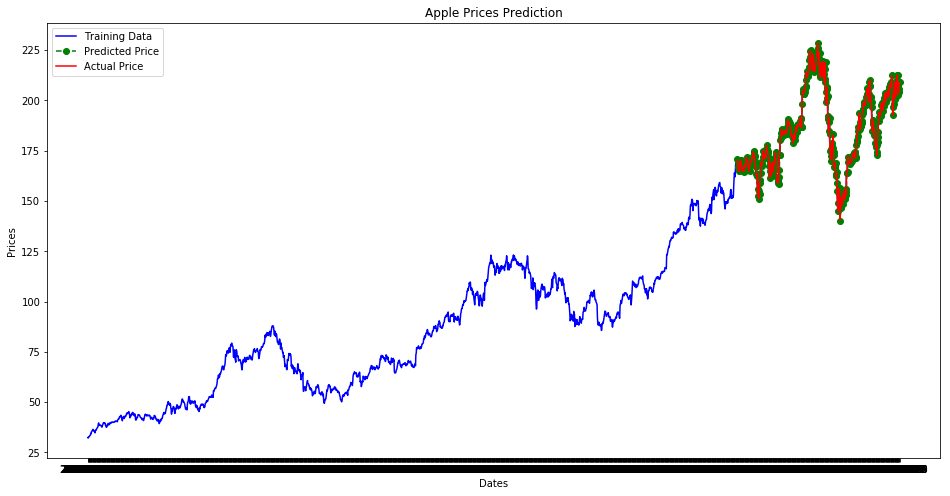

In [0]:
plt.figure(figsize=(16,8))
plt.plot(df['Adj Close'], 'green', color='blue', label='Training Data')
plt.plot(test_data.index, predictions, color='green', marker='o', linestyle='dashed', 
         label='Predicted Price')
plt.plot(test_data.index, test_data['Adj Close'], color='red', label='Actual Price')
plt.title('Apple Prices Prediction')
plt.xlabel('Dates')
plt.ylabel('Prices')

plt.legend()

In [0]:
pd_predictions_arima = pd.DataFrame(predictions)
pd_predictions_arima.head()

,0
0,170.698886
1,170.095912
2,169.484121
3,166.845675
4,164.682011


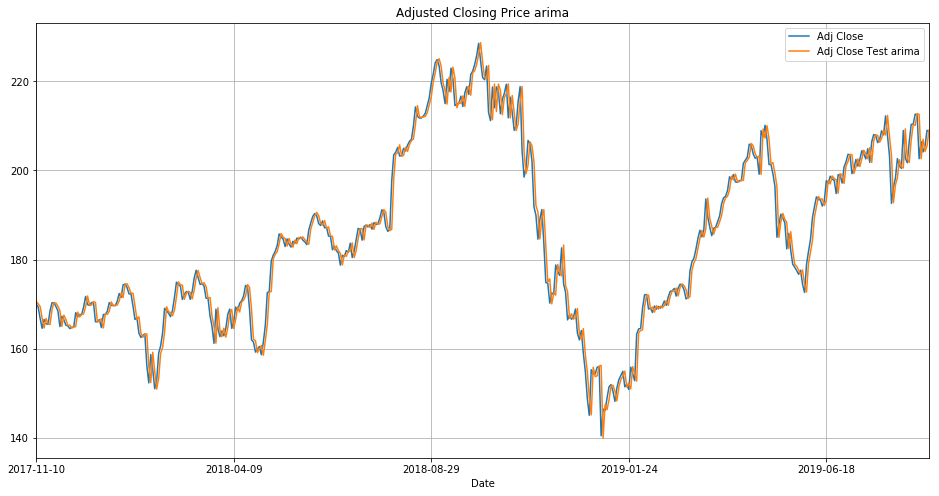

In [0]:
df_arima = test_data.copy()

df_arima['Adj Close Test arima'] = pd_predictions_arima.values
df_arima.drop(['Open', 'High', 'Low', 'Close', 'Volume'], axis=1, inplace=True)


df_arima.plot(label='AAPL', figsize=(16,8), title='Adjusted Closing Price arima', grid=True)

In [0]:
from fbprophet import Prophet


In [0]:
df =pd.read_csv('AAPL.csv')
df_prophet =df.copy()

df_prophet['ds']= df['Date']
df_prophet['y'] = df['Adj Close']
df_prophet.drop(['Date','Open', 'High', 'Low', 'Close', 'Volume', 'Adj Close'], axis=1, inplace=True)

df_prophet.tail()

,ds,y
2258,2019-08-26,206.490005
2259,2019-08-27,204.160004
2260,2019-08-28,205.529999
2261,2019-08-29,209.009995
2262,2019-08-30,208.740005


In [0]:
prophet_model = Prophet()
prophet_model.fit(df_prophet)

In [0]:

prephet_prediction_test_lower = prophet_model.predict(df_prophet[int(len(df_prophet)*0.8):])['yhat_lower']
prephet_prediction_test_upper = prophet_model.predict(df_prophet[int(len(df_prophet)*0.8):])['yhat_upper']
prephet_prediction_test_yhat = prophet_model.predict(df_prophet[int(len(df_prophet)*0.8):])['yhat']



In [0]:
print('prophet_model' ,rmsle(test_ar, prephet_prediction_test_yhat))
df_prophet_test = df_prophet[int(len(df_prophet)*0.8):].copy()




prophet_model 15.472066531309766


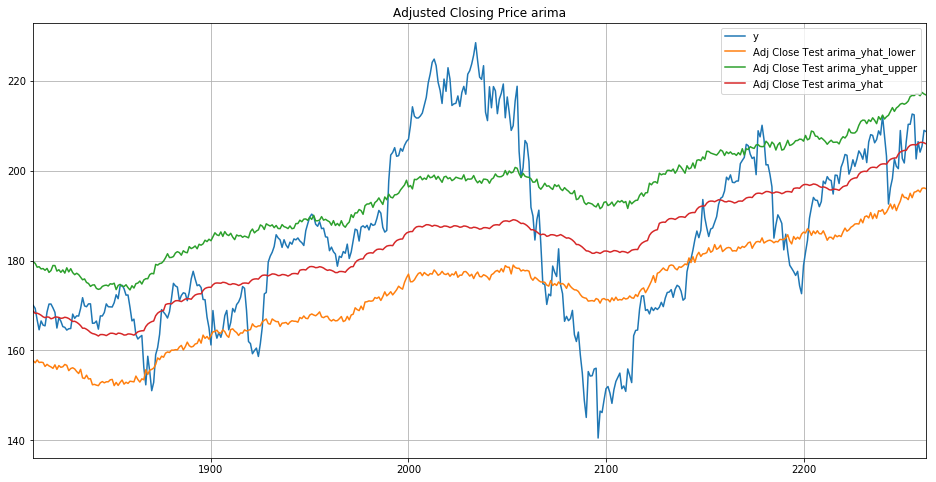

In [0]:
df_prophet_test['Adj Close Test arima_yhat_lower'] =prephet_prediction_test_lower .values
df_prophet_test['Adj Close Test arima_yhat_upper'] =prephet_prediction_test_upper.values
df_prophet_test['Adj Close Test arima_yhat'] =prephet_prediction_test_yhat.values

df_prophet_test.plot(label='AAPL', figsize=(16,8), title='Adjusted Closing Price arima', grid=True)

In [0]:
future= prophet_model.make_future_dataframe(periods=365)
future.tail()

,ds
2623,2020-08-25
2624,2020-08-26
2625,2020-08-27
2626,2020-08-28
2627,2020-08-29


In [0]:
forecast =prophet_model.predict(future)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()


,ds,yhat,yhat_lower,yhat_upper
2623,2020-08-25,224.625330,201.732251,246.765544
2624,2020-08-26,224.650246,202.090329,246.165368
2625,2020-08-27,224.565718,201.399024,247.592406
2626,2020-08-28,224.367183,200.210966,245.988948
2627,2020-08-29,222.402431,198.352432,243.519559


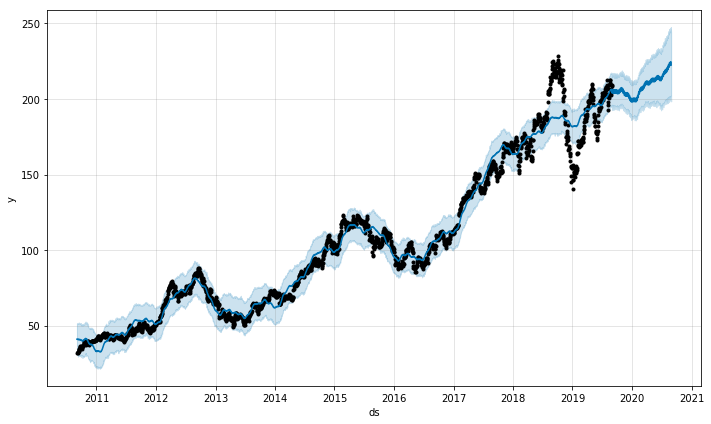

In [0]:
fig1= prophet_model.plot(forecast)

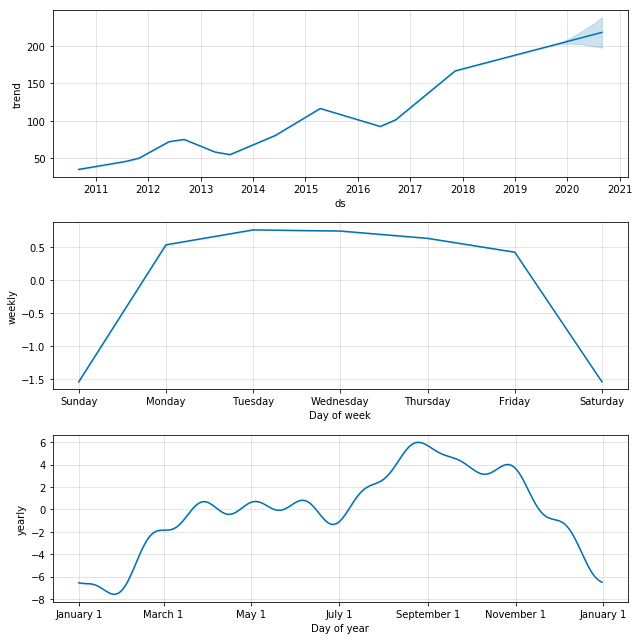

In [0]:
fig2 = prophet_model.plot_components(forecast)
